<a href="https://colab.research.google.com/github/YuliAlvarezV/CasoEstudioHR/blob/main/Retirados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####paquete básicos ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Cargar base de datos y eliminar columnas innecesarias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # se carga la base de datos
df_retirados = pd.read_csv("/content/drive/MyDrive/COLAB/retirement_info.csv") # se carga la base de datos
df_retirados

,Unnamed: 0.1,Unnamed: 0,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,0,0,2,Yes,2016-10-15,Resignation,Others
1,1,1,7,Yes,2016-07-20,Resignation,Stress
2,2,2,14,Yes,2016-11-08,Resignation,Others
3,3,3,29,Yes,2016-10-15,Resignation,Others
4,4,4,31,Yes,2016-02-08,Resignation,Salary
...,...,...,...,...,...,...,...
706,706,706,4382,Yes,2015-04-18,Resignation,Salary
707,707,707,4387,Yes,2015-09-16,Resignation,Others
708,708,708,4389,Yes,2015-05-24,Resignation,Others
709,709,709,4392,Yes,2015-02-26,Fired,NaN


In [ ]:
###Se eliminan columnas innecesarias
df_retirados = df_retirados.drop(columns=['Unnamed: 0.1'])
df_retirados = df_retirados.drop(columns=['Unnamed: 0'])
df_retirados

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,2016-10-15,Resignation,Others
1,7,Yes,2016-07-20,Resignation,Stress
2,14,Yes,2016-11-08,Resignation,Others
3,29,Yes,2016-10-15,Resignation,Others
4,31,Yes,2016-02-08,Resignation,Salary
...,...,...,...,...,...
706,4382,Yes,2015-04-18,Resignation,Salary
707,4387,Yes,2015-09-16,Resignation,Others
708,4389,Yes,2015-05-24,Resignation,Others
709,4392,Yes,2015-02-26,Fired,NaN


In [ ]:
###Verificar lectura correcta de los datos
df_retirados.sort_values(by=['EmployeeID'],ascending=1).head(100)


,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,2016-10-15,Resignation,Others
1,7,Yes,2016-07-20,Resignation,Stress
2,14,Yes,2016-11-08,Resignation,Others
3,29,Yes,2016-10-15,Resignation,Others
4,31,Yes,2016-02-08,Resignation,Salary
...,...,...,...,...,...
95,544,Yes,2016-07-31,Resignation,Others
96,556,Yes,2016-05-27,Resignation,Others
97,571,Yes,2016-04-06,Resignation,Others
98,572,Yes,2016-04-27,Resignation,Others


##Analizar la información de la base de datos, nulos y tipo de variables

In [ ]:
df_retirados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  641 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [ ]:
##Se cambia el tipo de variable retirementDate a fecha
df_retirados['retirementDate']=pd.to_datetime(df_retirados['retirementDate'])

In [ ]:
##Se cambia el tipo de variable EmployeeID a categorica
df_retirados = df_retirados.astype({'EmployeeID': object})

In [ ]:
##Se cuentan los nulos
df_retirados.isnull().sum()

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [ ]:
##Se cambian los nulos de la columna resignationReason por 'Others'
df_retirados['resignationReason'] = df_retirados['resignationReason'].fillna('Others')

In [ ]:
df_retirados.isnull().sum()

EmployeeID           0
Attrition            0
retirementDate       0
retirementType       0
resignationReason    0
dtype: int64

##Contar cada variable y graficar

In [ ]:
#Contar los valores unicos de Attrition
df_retirados['Attrition'].value_counts()

Yes    711
Name: Attrition, dtype: int64

In [ ]:
#Contar los valores unicos de retirementType
df_retirados['retirementType'].value_counts()

Resignation    641
Fired           70
Name: retirementType, dtype: int64

In [ ]:
#Contar los valores unicos de resignationReason
df_retirados['resignationReason'].value_counts()

Others    393
Salary    189
Stress    129
Name: resignationReason, dtype: int64

In [ ]:
##Contar los valores unicos de retirementDate
df_retirados['retirementDate'].value_counts()

2016-09-04    6
2016-06-23    6
2016-01-28    6
2016-10-20    5
2016-02-22    5
             ..
2016-12-01    1
2016-04-28    1
2016-09-15    1
2016-05-24    1
2015-01-26    1
Name: retirementDate, Length: 361, dtype: int64

In [ ]:
#Agregar nueva columna para agrupar fechas por año
#Fecha_año = df_retirados
#Fecha_año['Año'] = pd.DatetimeIndex(Fecha_año['retirementDate']).year
#Fecha_año.groupby("Año").count().agg("EmployeeID")


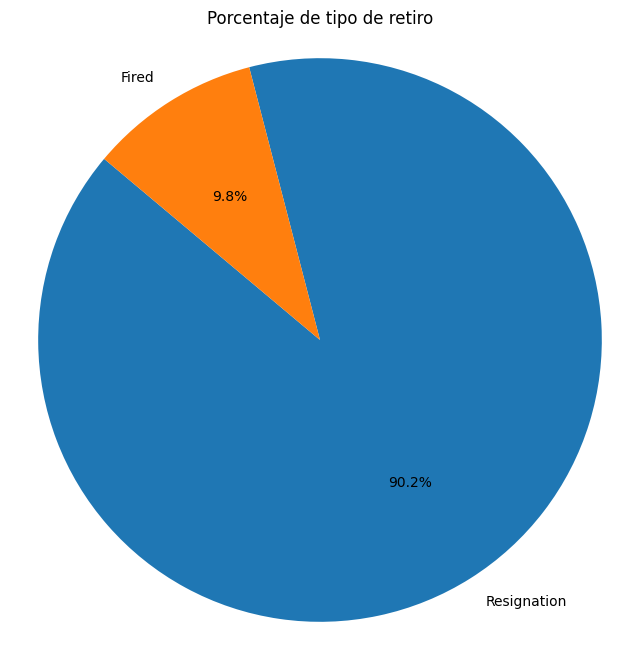

In [ ]:
#Gráfico de pastel retirementType
retirementType = df_retirados["retirementType"].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(retirementType, labels= retirementType.index, autopct='%1.1f%%', startangle=140)  # Crear gráfico de pastel
plt.axis('equal')  # Aspecto de círculo
plt.title("Porcentaje de tipo de retiro")  # Título del gráfico

plt.show()

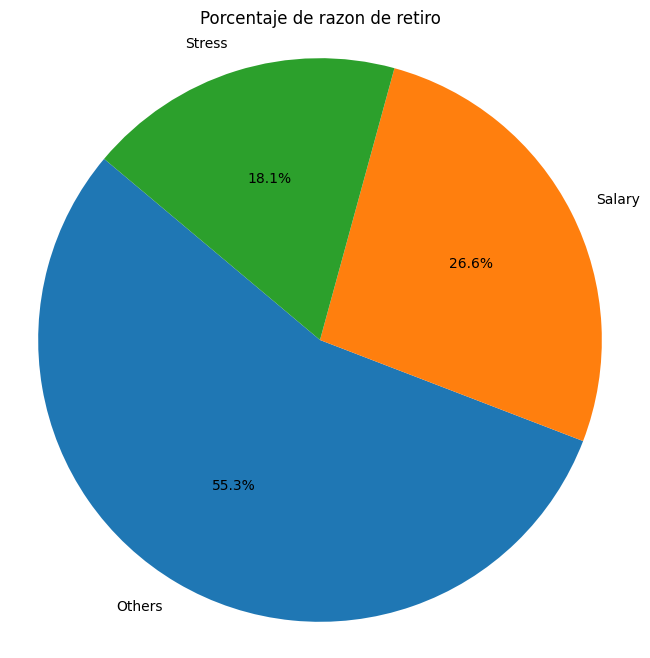

In [ ]:
#Gráfico de pastel resignationReason
resignationReason = df_retirados["resignationReason"].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(resignationReason, labels= resignationReason.index, autopct='%1.1f%%', startangle=140)  # Crear gráfico de pastel
plt.axis('equal')  # Aspecto de círculo
plt.title("Porcentaje de razon de retiro")  # Título del gráfico

plt.show()